In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('telecom_churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [4]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


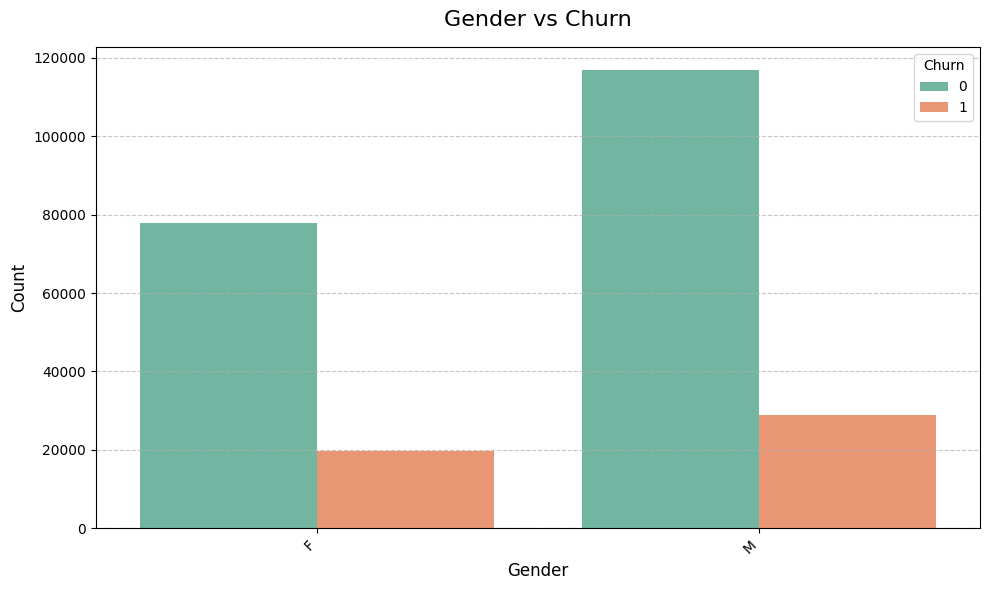

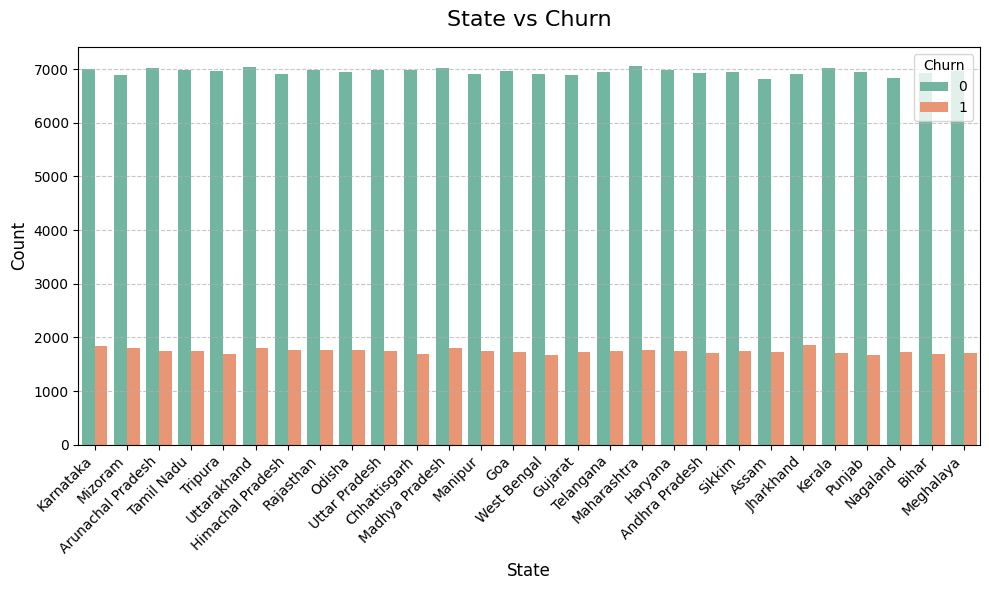

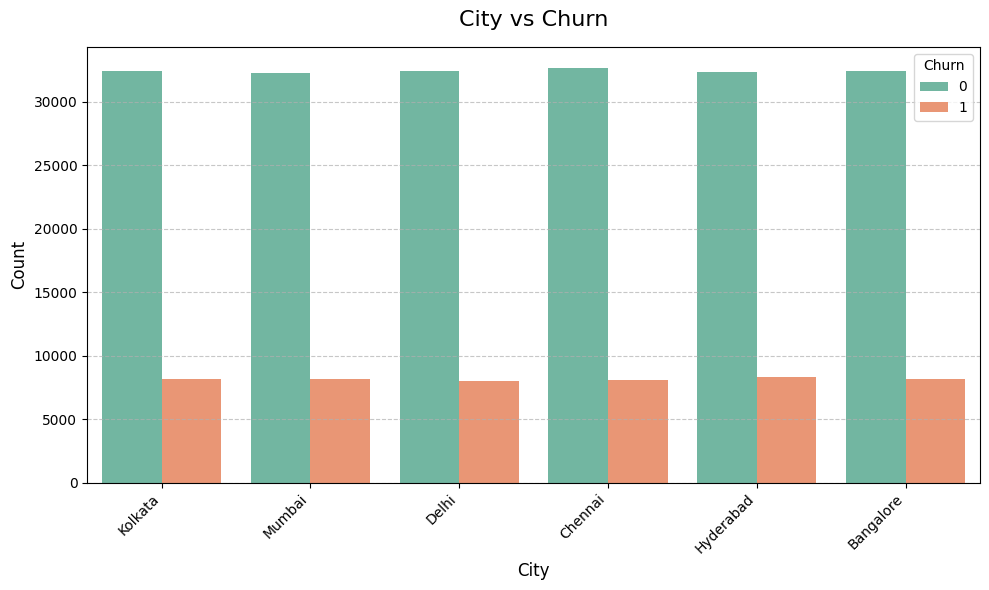

In [5]:
categorical_features = ['gender', 'state', 'city']
target_col = 'churn'

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=target_col, data=data, palette='Set2')

    plt.title(f'{col.title()} vs Churn', fontsize=16, pad=15)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(col.title(), fontsize=12)

    # Rotate x labels if too many
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.legend(title=target_col.title(), loc='upper right', fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


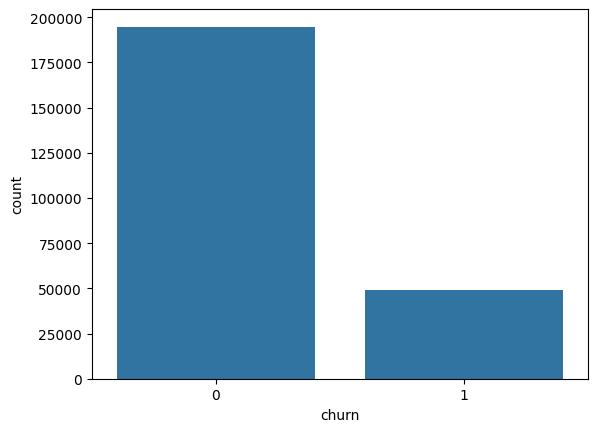

In [6]:
sns.countplot(x='churn', data=data)
plt.show()

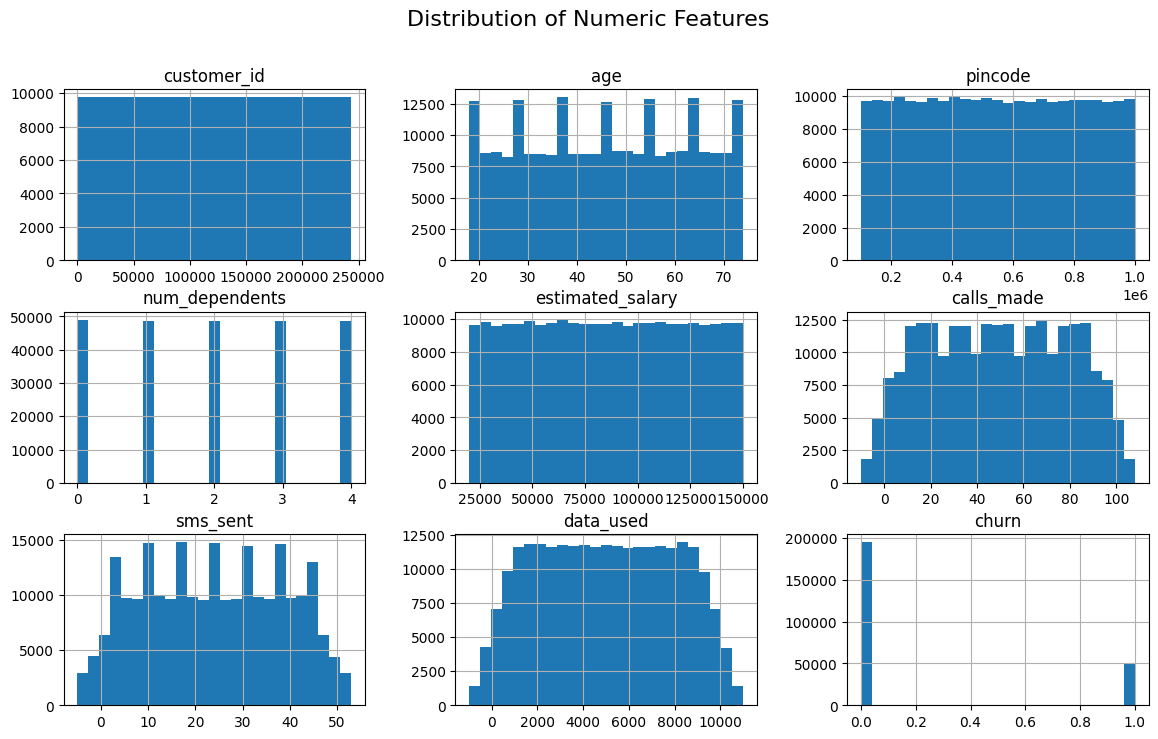

In [7]:
# Define target column
target_col = 'Churn'   # change this if your target column has a different name

# Select only numeric columns (int or float)
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column if it's numeric
num_plot_cols = [c for c in num_cols if c != target_col]

# Plot histograms only for numeric columns
if len(num_plot_cols) > 0:
    data[num_plot_cols].hist(bins=25, figsize=(14,8))
    plt.suptitle('Distribution of Numeric Features', fontsize=16)
    plt.show()
else:
    print("No numeric columns found for plotting.")


In [8]:
# basic cleaning & ID removal
data = data.drop(columns=['customer_id'], errors='ignore')
data = data.drop(columns=['pincode'], errors='ignore')
data = data.drop(columns=['date_of_registration'], errors='ignore')
    
data = data.drop_duplicates().copy()

print('Shape after dropping IDs & duplicates:', data.shape)

Shape after dropping IDs & duplicates: (243553, 11)


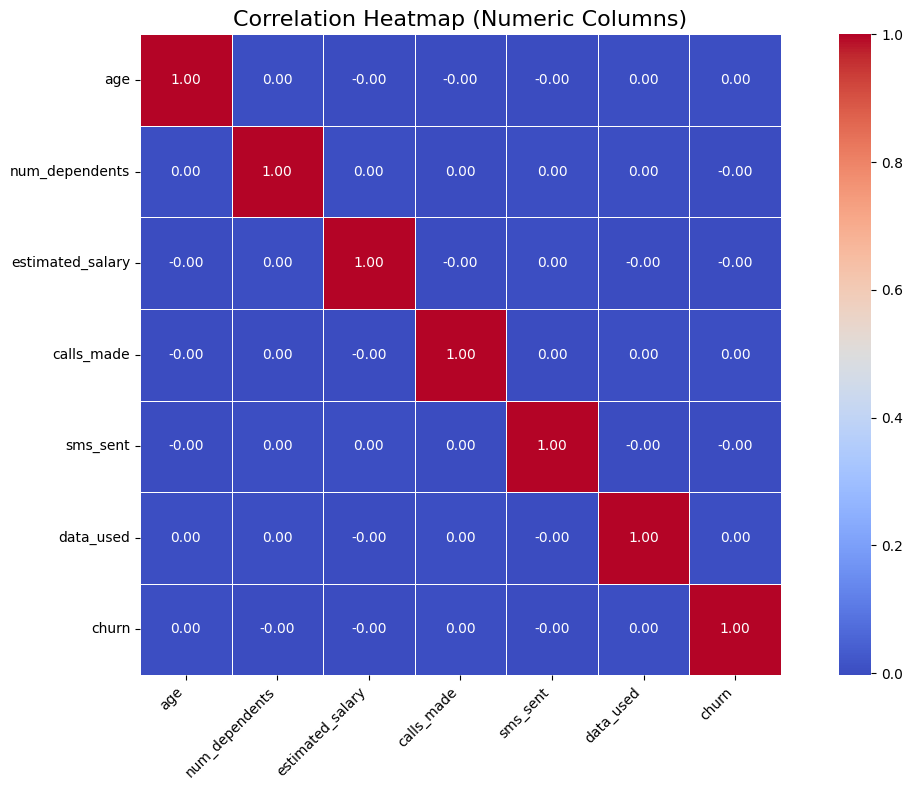

In [10]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            cbar=True, 
            square=True, 
            linewidths=0.5,
            annot_kws={"size":10})
plt.title("Correlation Heatmap (Numeric Columns)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
